In [1]:
!pip install easyocr
!pip install imutils
!pip freeze
!pip install git+git://github.com/jaidedai/easyocr.git
!pip install logger


alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.3
anvil-uplink==0.3.36
asn1crypto==1.0.1
astroid==2.3.1
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.2.0
Babel==2.7.0
backcall==0.1.0
backports.functools-lru-cache==1.5
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.7.12
conda-build==3.18.9
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0
cryptography==2.7
cycler==0.10.0
Cython==0.29.13
cytoolz==0.10.0
dask==2.5.2
decorator==4.4.0
defusedxml==0.6.0
distributed==2.5.2
docutils==0.15.2
easyocr==1.3.0.1
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
filelock==3.0.12
Flask==1.1.1
fsspec==0.5.2
future==0.17.1
gevent==1.4.0
g

  Running command git clone -q git://github.com/jaidedai/easyocr.git 'C:\Users\LENOVA\AppData\Local\Temp\pip-req-build-jhhgo6n6'
  ERROR: Error [WinError 2] Sistem belirtilen dosyayı bulamıyor while executing command git clone -q git://github.com/jaidedai/easyocr.git 'C:\Users\LENOVA\AppData\Local\Temp\pip-req-build-jhhgo6n6'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


  Using cached https://files.pythonhosted.org/packages/73/2f/b0d28eaa1e2c1cf64129f8da3fe701888d152677fec708cd0f13e8309e1e/logger-1.4.tar.gz
  Created wheel for logger: filename=logger-1.4-cp37-none-any.whl size=1798 sha256=a7ae85715a6d6077ea3f288556a485b0819072e33842e586da47e372b22583ce
  Stored in directory: C:\Users\LENOVA\AppData\Local\pip\Cache\wheels\91\d4\96\08341e2ac92c1ed4b760e4848e1acda3795f0257a83b94b42e
Successfully built logger


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr






1-) Görüntüyü Gri Tonlama ve Bulanık Bir Şekilde Okuma

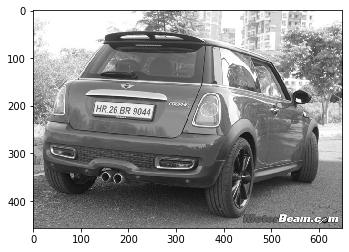

In [4]:
img = cv2.imread('12.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

2-)Filtreleme İşlemi

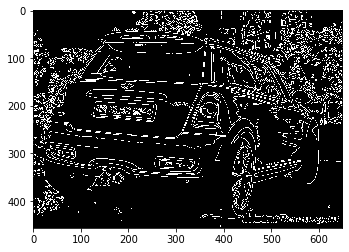

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200) #Kenar alhılama
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

3-)Kontürleme ve Maskeleme İşlemi

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

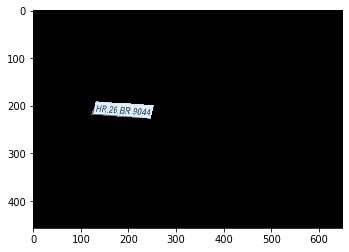

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

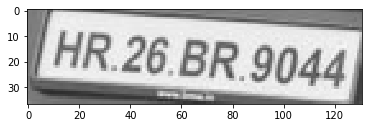

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

4-) Easy OCR Kullanarak Meti Çıkarma

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5823534421148652)]

5-)Tespit Edilen Plakayı Yazma

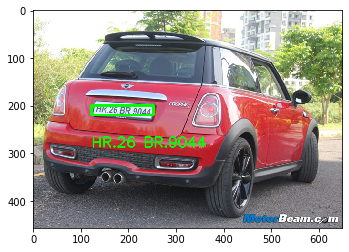

In [14]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))